<a href="https://colab.research.google.com/github/rishuraj27/PD-Modelling/blob/master/lower_price_predictor_Bayessian_Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
# for var in categorical:
#   plt.hist(train_df[var],train_df["Attrition_rate"])
#   plt.xlabel(var)
#   plt.show()

In [14]:
train_df = pd.read_csv("/content/Train.csv")
test_df = pd.read_csv("/content/Test.csv")

In [15]:
train_df["Date"]=pd.to_datetime(train_df["Date"])
test_df["Date"]=pd.to_datetime(test_df["Date"])

In [17]:
for i in train_df.columns:
  print(i,len(train_df[i].unique()))
print("**")
for i in test_df.columns:
  print(i,len(test_df[i].unique()))

Item_Id 9798
Date 1070
State_of_Country 21
Market_Category 275
Product_Category 17
Grade 4
Demand 1207
Low_Cap_Price 5392
High_Cap_Price 6468
month 12
**
Item_Id 5763
Date 617
State_of_Country 20
Market_Category 240
Product_Category 17
Grade 4
Demand 860
High_Cap_Price 4781
month 12


In [18]:
print(train_df.info())
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item_Id           9798 non-null   object        
 1   Date              9798 non-null   datetime64[ns]
 2   State_of_Country  9798 non-null   int64         
 3   Market_Category   9798 non-null   int64         
 4   Product_Category  9798 non-null   int64         
 5   Grade             9798 non-null   int64         
 6   Demand            9798 non-null   float64       
 7   Low_Cap_Price     9798 non-null   int64         
 8   High_Cap_Price    9798 non-null   int64         
 9   month             9798 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(1)
memory usage: 765.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype       

In [16]:
#train_df.loc[:,"year"]=train_df["Date"].dt.year
train_df.loc[:,"month"]=train_df["Date"].dt.month
#train_df.loc[:,"week"]=train_df["Date"].dt.week
#test_df.loc[:,"year"]=test_df["Date"].dt.year
test_df.loc[:,"month"]=test_df["Date"].dt.month
#test_df.loc[:,"week"]=test_df["Date"].dt.week

In [12]:
print(train_df.shape)
print(test_df.shape)

(9798, 11)
(5763, 10)


In [ ]:
for i in train_df.columns :
  print(train_df[i].value_counts())

In [3]:
train_df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [ ]:
# est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
# b_ = ["b"+str(x) for x in range(10)]
# train_df["Age"] = pd.qcut(train_df["Age"],q=10,labels=b_)
# test_df["Age"] = pd.qcut(test_df["Age"],q= 10,labels=b_)
# #train_df["Age"].value_counts()

In [4]:
# train_df.groupby("Unit")["Attrition_rate"].agg("mean")

In [19]:
numerical= ["Demand","High_Cap_Price"] 
dep = ['Low_Cap_Price']
date_=["Date"]
integer =['High_Cap_Price']
categorical = ["State_of_Country","Market_Category","Product_Category","Grade"]
cc=["Product_Category","Grade",'month']

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Item_Id           9798 non-null   object        
 1   Date              9798 non-null   datetime64[ns]
 2   State_of_Country  9798 non-null   int64         
 3   Market_Category   9798 non-null   int64         
 4   Product_Category  9798 non-null   int64         
 5   Grade             9798 non-null   int64         
 6   Demand            9798 non-null   float64       
 7   Low_Cap_Price     9798 non-null   int64         
 8   High_Cap_Price    9798 non-null   int64         
 9   year              9798 non-null   int64         
 10  month             9798 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 842.1+ KB


## Missing treatment

In [ ]:
# train_df[numerical].isnull().sum()

In [11]:
# train_df[categorical].isnull().sum()

In [ ]:
# #Train numerical data imputation
# from sklearn.impute import KNNImputer
# from sklearn.impute import SimpleImputer
# #imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer = KNNImputer(n_neighbors=5,weights='distance')
# train_df[numerical] = pd.DataFrame(imputer.fit_transform(train_df[numerical]),columns=numerical)
# test_df[numerical] = pd.DataFrame(imputer.fit_transform(test_df[numerical]),columns=numerical)

In [ ]:
# #Test numerical data imputation
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=5,weights='distance')
# test_df[numerical] = pd.DataFrame(imputer.fit_transform(test_df[numerical]),columns=numerical)

In [ ]:
# for var in integer:
#     train_df[var] = np.round(train_df[var])
#     test_df[var] = np.round(test_df[var])

In [ ]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# train_df[categorical]= imp.fit_transform(train_df[categorical])
# test_df[categorical]= imp.fit_transform(test_df[categorical])

In [8]:
# train_df.isnull().sum()

In [10]:
 #test_df.isnull().sum()

## Encoding categorical variable

In [20]:
#categorical.remove("Employee_ID")
train_df= pd.get_dummies(train_df,columns= cc)
test_df= pd.get_dummies(test_df,columns= cc)

In [21]:
print(train_df.shape)
print(test_df.shape)

(9798, 40)
(5763, 39)


## Outlier Treatment

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


In [8]:
data_out = train_df[numerical].copy(deep=True)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_out = scaler.fit_transform(data_out)

In [ ]:
len(numerical)

11

In [ ]:
neigh = NearestNeighbors(n_neighbors=len(numerical)-1)
nbrs = neigh.fit(data_out)
distances, indices =nbrs.kneighbors(data_out)

In [ ]:
distances = distances[:,len(numerical)-2]
distances = np.sort(distances,axis=0)

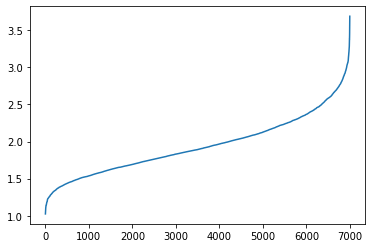

In [ ]:
plt.plot(distances)

In [ ]:
outlier_detection = DBSCAN(eps=2.8, min_samples= 12)
clustering = outlier_detection.fit(data_out)
unique_elements, counts_elements = np.unique(clustering.labels_,return_counts=True)
np.asarray((unique_elements,counts_elements))

array([[  -1,    0],
       [   8, 6992]])

In [ ]:
outlier_indicies= []
for i in range(len(clustering.labels_)):
  if clustering.labels_[i] == -1:
    outlier_indicies.append(i)

In [ ]:
data_out_ind = set(train_df.index)
inliers_indicies = data_out_ind - set(outlier_indicies)

In [ ]:
train_df= train_df.iloc[list(inliers_indicies),:]

## dependent and independent variable

In [22]:
item_id_id=train_df[["Item_Id"]]
X=train_df.drop(["Item_Id","Low_Cap_Price","Date"],axis=1)
y=train_df[["Low_Cap_Price"]]
df_test = test_df.drop(["Item_Id","Date"],axis=1) 
#X = scaler.fit_transform(X)
print(X.shape)
print(df_test.shape)

(9798, 37)
(5763, 37)


In [23]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.linear_model import BayesianRidge
#dt = DecisionTreeRegressor(random_state=3)
#dt = DecisionTreeClassifier(random_state=3)
#dt = RandomForestClassifier(random_state=3)
dt = RandomForestRegressor(random_state=3)
#dt= ExtraTreesRegressor(max_depth=2,min_samples_leaf=.22,random_state=3)
#dt=BayesianRidge(compute_score=True)
#abd_reg = AdaBoostRegressor(base_estimator=dt,n_estimators=100)
#sgbt=GradientBoostingRegressor(max_depth=1,subsample=0.8,max_features=0.1,n_estimators=250,random_state=3)

In [ ]:
# param_dt = {"max_depth":[1,2,3,8,9,10,15,20],
#             "min_samples_leaf":[0.2,0.22,.24,.3,.33],
#             "max_features":[0.6,0.8,1]
#             }
# grid_dt = GridSearchCV(estimator=dt,param_grid=param_dt,scoring='neg_root_mean_squared_error',cv=10)

In [ ]:
# # Hyperparameter tunning for BR
# param_dt = {"n_iter":[10,50,100,200,300,400,500],
#             # "tol":[10**(-x) for x in range(3,7)],
#             # "alpha_1":[10**(-x) for x in range(4,9)],
#             # "alpha_2": [10**(-x) for x in range(4,9)],
#             # "lambda_1" : [10**(-x) for x in range(4,9)],
#             # "lambda_2": [10**(-x) for x in range(4,9)]
#             }
# grid_dt = GridSearchCV(estimator=dt,param_grid=param_dt,scoring='neg_root_mean_squared_error',cv=5)

In [150]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [24]:
# import warnings
# warnings.filterwarnings("ignore")
#y_train = np.round(y_train)
# dt.fit(X_train,y_train)
#dt.fit(X_train,y_train)
dt.fit(X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=3, verbose=0, warm_start=False)

In [34]:
# best_param=grid_dt.best_params_
# # best_param

In [35]:
# b_e = grid_dt.best_estimator_
# b_e

In [36]:
# grid_dt.best_score_

In [105]:
from sklearn.metrics import mean_squared_log_error 

In [153]:
score=max(0,(100-mean_squared_log_error(y_test,y_pred)))
print(score)

99.90071536049157


In [152]:
y_pred= dt.predict(X_test)
min(y_pred)
max(y_pred)

12221.4

In [154]:
print(np.max(y_test))
print(np.min(y_test))
print(np.max(y_pred))
print(np.min(y_pred))

Low_Cap_Price    17580
dtype: int64
Low_Cap_Price    1
dtype: int64
12221.4
160.62


In [67]:
# mse_dt=MSE(y_test,y_pred)
# rmse_dt = np.sqrt(mse_dt)
# rmse_dt

In [56]:
# score = 100* max(0, 1-rmse_dt )
# score

In [25]:
#test_df_final = test_df.drop(["Item_Id",'Date'],axis =1)
y_test_pred = dt.predict(df_test)

In [ ]:
y_test_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
dd = {"Item_Id":test_df["Item_Id"], "Low_Cap_Price":y_test_pred}
result = pd.DataFrame(dd)

result.set_index('Item_Id', inplace=True)

In [157]:
result.describe()

,Low_Cap_Price
count,5763.000000
mean,5645.985355
std,2626.487103
min,191.580000
25%,3761.755000
50%,5586.420000
75%,7293.920000
max,15041.490000


In [28]:
result.to_csv("/content/result_06.csv")

In [ ]:
score = 100* max(0, 1-rmse_dt )
score

80.7505357914807

In [ ]:
# # Neural Net
# import tensorflow as tf
# # GRADED FUNCTION: train_mnist
# def train_mnist():
#     # Please write your code only where you are indicated.
#     # please do not remove # model fitting inline comments.

#     # YOUR CODE SHOULD START HERE
#     class myCallback(tf.keras.callbacks.Callback):
#         def on_epoch_end(self,epoch,log={}):
#             if log.get("acc")>0.99:
#                 print("/n Reached 99% accuracy so cancelling training/n")
#                 self.model.stop_training = True
#     # YOUR CODE SHOULD END HERE
    
#     callbacks = myCallback()
#     mnist = tf.keras.datasets.mnist

#     (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
#     # YOUR CODE SHOULD START HERE
#     x_train = x_train/255.0
#     x_test = x_test/255.0
#     # YOUR CODE SHOULD END HERE
#     model = tf.keras.models.Sequential([
#         # YOUR CODE SHOULD START HERE
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512,activation = tf.nn.relu),
#     tf.keras.layers.Dense(10, activation = tf.nn.softmax)
#         # YOUR CODE SHOULD END HERE
#     ])

#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     # model fitting
#     history = model.fit(# YOUR CODE SHOULD START HERE
#         x_train,y_train,epochs=10,callbacks =[callbacks]
#               # YOUR CODE SHOULD END HERE
#     )
#     # model fitting
#     return history.epoch, history.history['acc'][-1]


# # GRADED FUNCTION: house_model
# def house_model(y_new):
#     xs = np.array([float(x) for x in range(1,10)])
#     ys = np.array([0.5+0.5*i for i in range(1,10)])
#     model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
#     model.compile(optimizer = "sgd", loss = "mean_squared_error")
#     model.fit(xs,ys,epochs=500)
#     return model.predict(y_new)[0]